In [10]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [11]:
# Sending a GET request to the website
url = 'https://www.statista.com/statistics/1103458/india-novel-coronavirus-covid-19-cases-by-state/'
response = requests.get(url)


In [12]:
# Parsing the HTML content
soup = BeautifulSoup(response.content, 'html.parser')


In [13]:
# Finding the table containing the data
table = soup.find('table')

In [14]:
# Extracting the table headers
headers = [header.text.strip() for header in table.find_all('th')]


In [15]:
# Extracting the table rows
rows = table.find_all('tr')[1:]  # Skip the first row (header row)

In [16]:
# Initializing empty lists to store the data
states = []
cases = []
deaths = []
recovered = []
active_cases = []

In [17]:

# Extracting the data from each row
for row in rows:
    cells = row.find_all('td')
    states.append(cells[0].text.strip())  # Extract state name
    cases.append(int(cells[1].text.strip().replace(',', '')))  # Extract number of cases
    deaths.append(int(cells[2].text.strip().replace(',', '')))  # Extract number of deaths
    recovered.append(int(cells[3].text.strip().replace(',', '')))  # Extract number of recoveries
    active_cases.append(int(cells[4].text.strip().replace(',', '')))  # Extract number of active cases

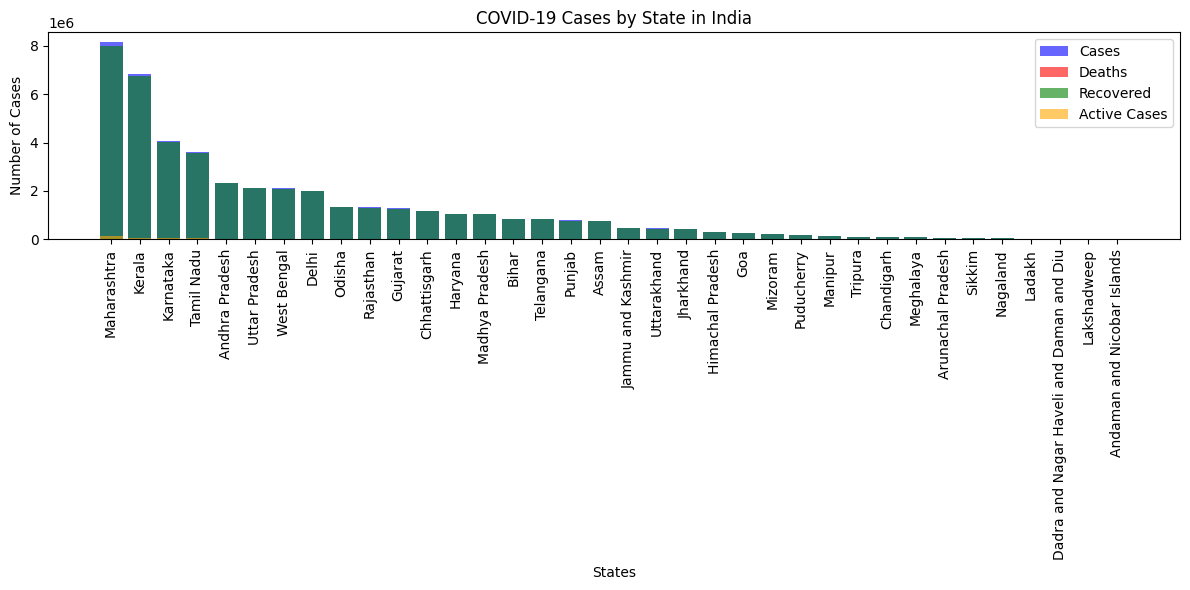

In [18]:
# Creating a bar chart to represent the data
plt.figure(figsize=(12, 6))
plt.bar(states, cases, label='Cases', color='blue', alpha=0.6)
plt.bar(states, deaths, label='Deaths', color='red', alpha=0.6)
plt.bar(states, recovered, label='Recovered', color='green', alpha=0.6)
plt.bar(states, active_cases, label='Active Cases', color='orange', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases by State in India')
plt.legend()
plt.tight_layout()
plt.show()